In [18]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PROJ_DATA'] = '/depot/dawson29/data/Projects/PERiLS/apps/perils/share/proj'
import glob
import pyart
import pydda
import numpy as np
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime
from pyart.core import HorizontalWindProfile

In [19]:
from dda_utils import load_grid
from dda_utils import load_sondes
from dda_utils import read_sondes

In [24]:
time_range = pd.date_range(start="2022-03-30 15:00:00",
                     end="2022-03-31 02:00:00", freq="10min").strftime("%Y%m%d_%H%M%S")

In [25]:
def drop_common_radar_files(file_list):
    file_list.sort()
    directory_dict = {}
    filtered_list = []

    for file_path in file_list:
        parent_dir = os.path.dirname(file_path)
        if parent_dir not in directory_dict:
            directory_dict[parent_dir] = True
            filtered_list.append(file_path)
                
    return filtered_list

In [56]:
from datetime import datetime, timedelta

def sonde_nearest_time_max_height(sondes, target_time, force_return=True):
    if len(sondes) == 1:
        selected_snd = sondes[0]
        max_height = read_sondes(selected_snd).height.max()
        if max_height > 4000:
            return selected_snd
        if force_return:
            return selected_snd
        else:
            print(f"Balloon flight failed at {max_height} m above the ground level")
            return None
    else:
        target_time = datetime.strptime(target_time, "%Y%m%d_%H%M%S")
        nearest_time_diff = timedelta.max  # Initialize to a large value
        selected_snd = None
        max_height = 0

        for sfile in sondes:
            stime_str = read_sondes(sfile)['time'].iloc[0].strftime("%Y%m%d_%H%M%S")
            stime = datetime.strptime(stime_str, "%Y%m%d_%H%M%S")
            time_diff = abs(stime - target_time)

            if time_diff < nearest_time_diff:
                max_height = read_sondes(sfile).height.max()
                if max_height > 4000:
                    nearest_time_diff = time_diff
                    selected_snd = sfile

    return selected_snd

# selected_snd = sonde_nearest_time_max_height(sondes, target_time)

In [57]:
for time in time_range:
    grids = load_grid(time=time, within_seconds=45)
    sondes = load_sondes(time, within_seconds=60*5)
    if len(sondes):
        if len(grids) > 1:
            grids = drop_common_radar_files(grids)
            for gfile in grids:
                if os.path.dirname(gfile).split(os.sep)[-1].lower() == "kgwx":
                    selected_grids = grids
                    selected_snd = sonde_nearest_time_max_height(sondes, time)
                    print("HAS KGWX")
                    print("----------- * -----------")
                    for gfile in selected_grids:
                        print(os.path.basename(gfile))
                    print(selected_snd)
                    print("-----------***-----------\n")

HAS KGWX
----------- * -----------
cfrad.20220330_184027.157_to_20220330_184150.307_COW1high_SUR.nc
KGWX20220330_184016_V06.nc
RAW_NA_000_100_20220330183925.nc
/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_sounding/upperair.UAH_Sonde.202203301837.Maben_MS.txt
-----------***-----------

HAS KGWX
----------- * -----------
cfrad.20220330_185010.569_to_20220330_185133.771_COW1high_SUR.nc
KGWX20220330_184942_V06.nc
/depot/dawson29/data/Projects/PERiLS/obsdata/2022/ULM/upperair.ULM_sonde.202203301855.Sturgis_MS.SHARPPY.txt
-----------***-----------

HAS KGWX
----------- * -----------
cfrad.20220330_201923.520_to_20220330_202141.378_COW1high_SUR.nc
cfrad.20220330_202009.004_to_20220330_202144.045_DOW7high_SUR.nc
KGWX20220330_201945_V06.nc
NOX220330202018.nc
cfrad.20220330_202036.435_to_20220330_202237.343_SR2_SUR.nc
RAW_NA_000_100_20220330201952.nc
/depot/dawson29/data/Projects/PERiLS/obsdata/2022/UAH_sounding/upperair.UAH_Sonde.202203302015.Maben_MS.txt
-----------***-----------

HAS

In [382]:
time = "20220331_002011"
grids = load_grid(time=time, within_seconds=45)
sondes = load_sondes(time, within_seconds=60*5)
if len(sondes):
    if len(grids) > 1:
        grids = drop_common_radar_files(grids)
        for gfile in grids:
            if os.path.dirname(gfile).split(os.sep)[-1].lower() == "kgwx":
                selected_grids = grids
                selected_snd = sonde_nearest_time_max_height(sondes, time)
                print("HAS KGWX")
                print("----------- * -----------")
                for gfile in selected_grids:
                    print(os.path.basename(gfile))
                print(selected_snd)
                print("-----------***-----------\n")

HAS KGWX
----------- * -----------
cfrad.20220331_002011.494_to_20220331_002141.557_COW1high_SUR.nc
cfrad.20220331_002009.026_to_20220331_002144.054_DOW7high_SUR.nc
cfrad.20220331_001952.253_to_20220331_002018.970_DOW8_SUR.nc
KGWX20220331_002040_V06.nc
NOX220331002003.nc
cfrad.20220331_002003.081_to_20220331_002151.515_SR2_SUR.nc
RAW_NA_000_100_20220331002003.nc
/depot/dawson29/data/Projects/PERiLS/obsdata/2022/non-radar_QC_Illinois/20220330_IOP02/SONDE5/sounding/L2/Hgt_20220331_SONDE5_0017
-----------***-----------



In [383]:
selected_grids

['/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/COW1/cfrad.20220331_002011.494_to_20220331_002141.557_COW1high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/DOW7/cfrad.20220331_002009.026_to_20220331_002144.054_DOW7high_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/DOW8/cfrad.20220331_001952.253_to_20220331_002018.970_DOW8_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/KGWX/KGWX20220331_002040_V06.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/NOXP/NOX220331002003.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/SMARTR2/cfrad.20220331_002003.081_to_20220331_002151.515_SR2_SUR.nc',
 '/depot/dawson29/data/Projects/PERiLS/obsdata/2022/COMMON_GRID/IOP2/UAH/RAW_NA_000_100_20220331002003.nc']

In [385]:
sonde_nearest_time_max_height(load_sondes("20220331_002011", 3*60), '20220331_002000', False)

In [386]:
def get_profile(selected_snd):
    '''Creates sounding profile for pydda'''
    df = read_sondes(selected_snd)
    df = df.dropna()
    wind_speed = df['speed'].values * units.knot
    wind_dir = df['direction'].values * units.degrees
    u, v = mpcalc.wind_components(wind_speed, wind_dir)
    height = df['height'].values * units.meter
    lat = df['lat'].values * units.degree
    lon = df['lon'].values * units.degree
    profile = HorizontalWindProfile(height=height,
                                    speed=wind_speed,
                                    direction=wind_dir,
                                    latitude=lat,
                                    longitude=lon)
    return profile

In [387]:
profile = get_profile(selected_snd)

In [388]:
def organize_grid_data(selected_grids):
    grid_data_by_directory = {}
    kgwx_grid = None

    for grid_file in selected_grids:
        parent_dir = os.path.dirname(grid_file)
        directory_name = os.path.basename(parent_dir)

        if directory_name not in grid_data_by_directory:
            grid_data_by_directory[directory_name] = {'path': grid_file,
                                                      'grid': pyart.io.read_grid(grid_file)
                                                     }

        # Check if the directory contains "KGWX" and kgwx_grid is not assigned yet
        if "KGWX" in directory_name.upper() and kgwx_grid is None:
            kgwx_grid = grid_data_by_directory[directory_name]['grid']

    # Remove the 'path' keys, as they are not needed in the final result
    for data in grid_data_by_directory.values():
        del data['path']

    # Create a list of grid objects with kgwx_grid as the first element (if available)
    grid_list = [kgwx_grid] + [data['grid'] for data in grid_data_by_directory.values()]

    return grid_list

In [389]:
grid_list = organize_grid_data(selected_grids)

In [390]:
grid_list[0] = pydda.initialization.make_wind_field_from_profile(Grid=grid_list[0], profile=profile, vel_field='VEL')

In [408]:
u_back = profile.u_wind
v_back = profile.v_wind
z_back = profile.height

new_grids, _ = pydda.retrieval.get_dd_wind_field(grid_list,
                                    u_back=u_back, v_back=v_back, z_back=z_back,
                                    Co=10.0, Cm=4096.0, frz=3800.0, Cb=1e-6,
                                    mask_outside_opt=False, wind_tol=0.2, max_iterations=200,
                                    engine="tensorflow", refl_field='REF', vel_name='VEL')

Interpolating sounding to radar grid
Interpolated U field:
tf.Tensor(
[      nan  8.766353 20.970554 24.307606       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan], shape=(41,), dtype=float32)
Interpolated V field:
tf.Tensor(
[       nan  1.4371165 -3.1602676 11.797896         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan     

In [409]:
from netCDF4 import num2date, date2num


def datetime_from_radar(radar, epoch=False):
    """ Return a datetime for the first ray in a Radar. """
    if epoch:
        dtrad = num2date(radar.time['data'][0], radar.time['units'])
        epnum = date2num(dtrad, EPOCH_UNITS)
        return num2date(epnum, EPOCH_UNITS)
    else:
        return num2date(radar.time['data'][0], radar.time['units'])

In [410]:
gtime = datetime_from_radar(grid_list[0]).strftime("%Y%m%d_%H%M%S")
gtime

'20220331_002040'

In [411]:
grid_list[0].fields['u']['min_bca'] = -100
grid_list[0].fields['u']['max_bca'] = 100
grid_list[0].fields['v']['min_bca'] = -100
grid_list[0].fields['v']['max_bca'] = 100

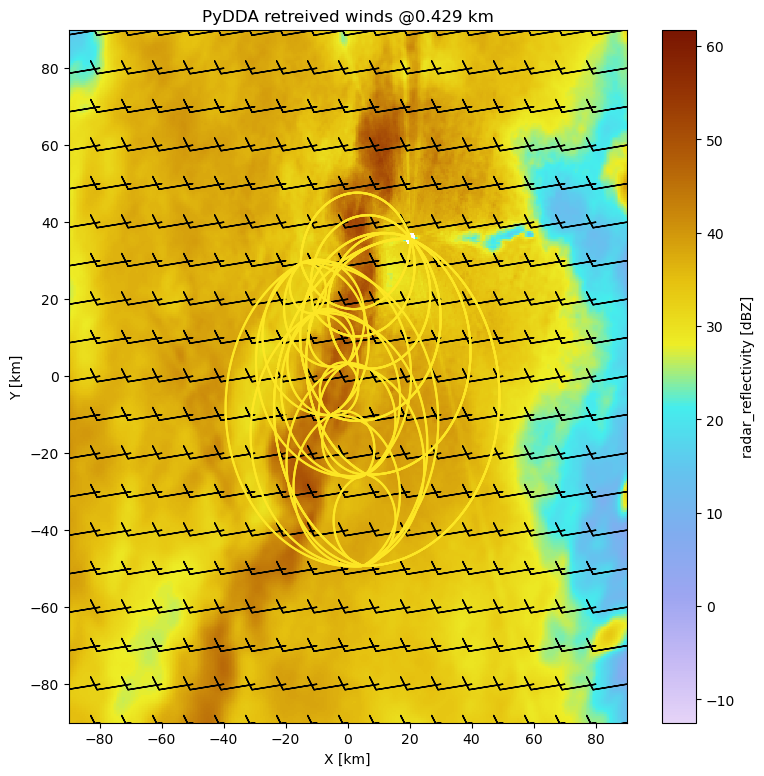

In [412]:
import matplotlib.pyplot as plt
# Plot a horizontal cross section
plt.figure(figsize=(9, 9))
pydda.vis.plot_horiz_xsection_barbs(grid_list, background_field='REF',
                                    level=1,
                                    w_vel_contours=None,
                                    barb_spacing_x_km=10.0,
                                    barb_spacing_y_km=10.0, )
plt.show()

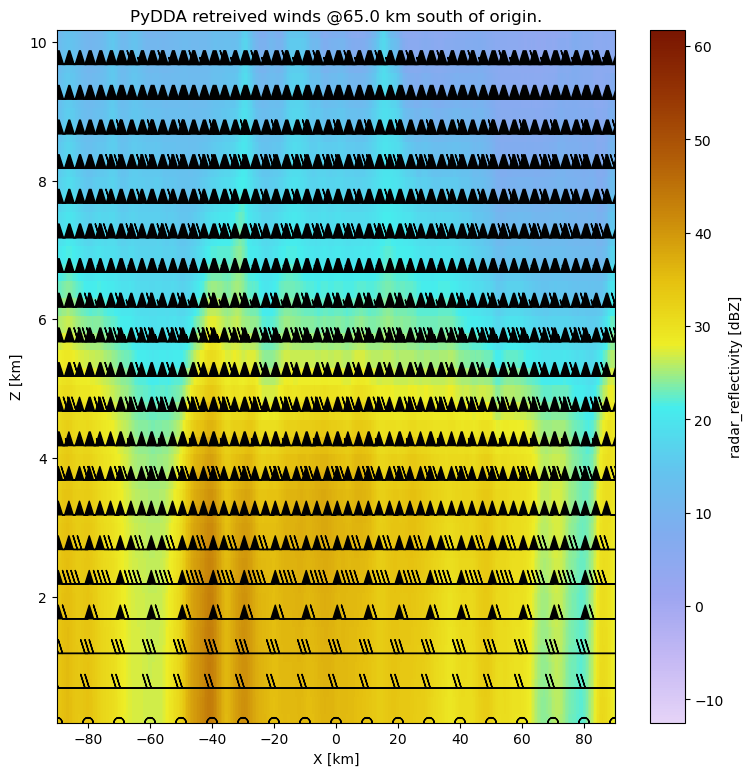

In [413]:
plt.figure(figsize=(9, 9))
pydda.vis.plot_xz_xsection_barbs(grid_list, background_field='REF',
                                    level=50,
                                    barb_spacing_x_km=10.0,)
plt.show()

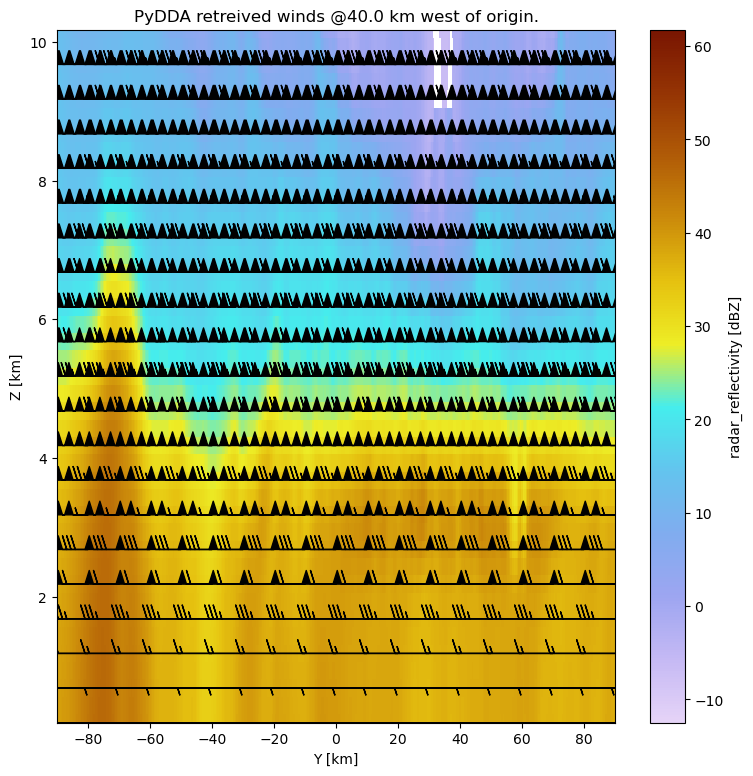

In [414]:
plt.figure(figsize=(9, 9))
pydda.vis.plot_yz_xsection_barbs(grid_list, background_field='REF',
                                    level=100,
                                    barb_spacing_y_km=10.0,)
plt.show()

<Axes: title={'center': 'PyDDA retreived winds @2.679 km'}, xlabel='X [km]', ylabel='Y [km]'>

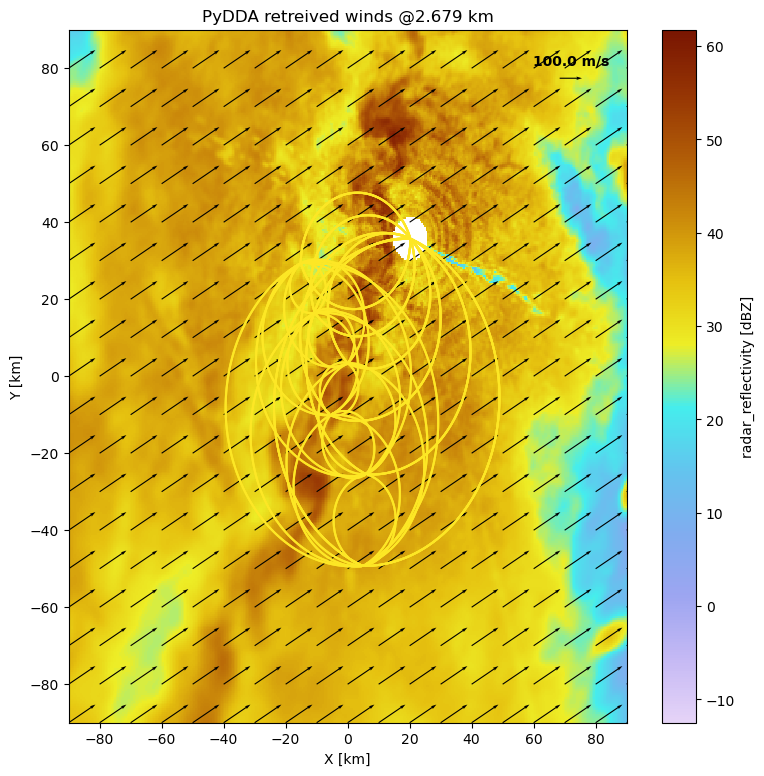

In [415]:
# Plot a horizontal cross section
plt.figure(figsize=(9, 9))
pydda.vis.plot_horiz_xsection_quiver(grid_list, background_field='REF',
                                    level=10, quiverkey_len=100.0, quiver_width=0.002)

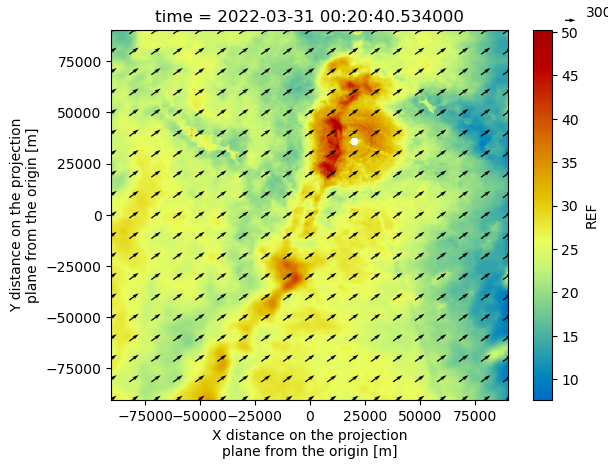

In [416]:
xg = grid_list[0].to_xarray().isel(time=0).mean("z")
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 20  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax, pivot='mid')

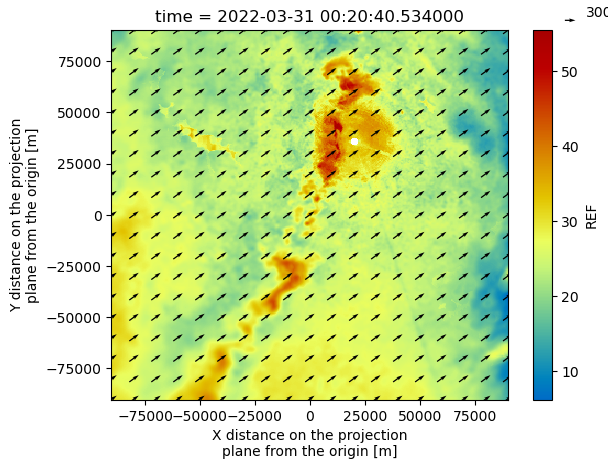

In [417]:
xg = grid_list[0].to_xarray().isel(time=0).median("z")
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 20  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax, pivot='mid')

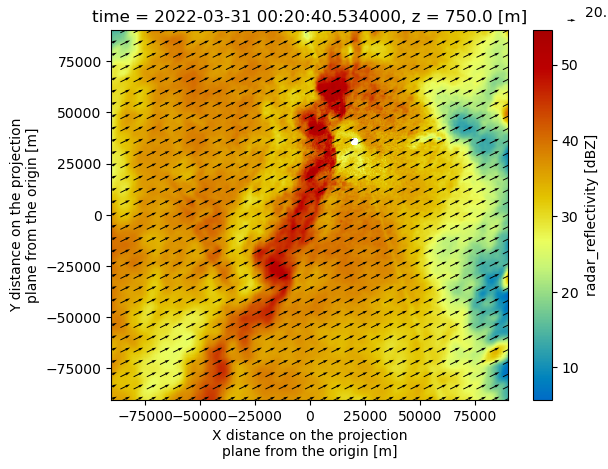

In [418]:
xg = grid_list[0].to_xarray().isel(time=0).isel(z=3)
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 12  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax, scale=1e3, pivot='mid')

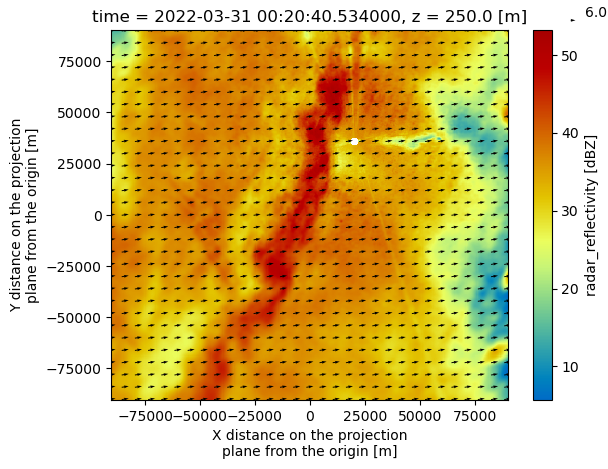

In [419]:
xg = grid_list[0].to_xarray().isel(time=0).isel(z=1)
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 12  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax,  pivot='mid')

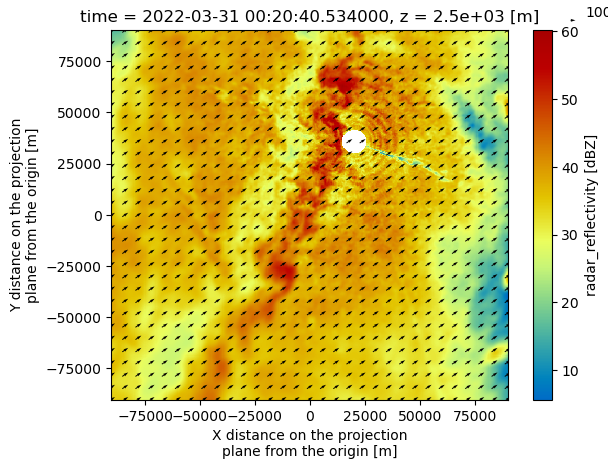

In [420]:
xg = grid_list[0].to_xarray().isel(time=0).isel(z=10)
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 12  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax, pivot='mid')

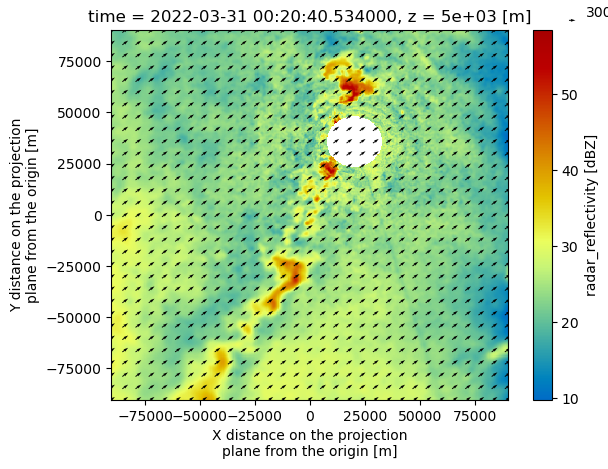

In [421]:
xg = grid_list[0].to_xarray().isel(time=0).isel(z=20)
fig, ax = plt.subplots()
xg['REF'].plot(cmap='pyart_HomeyerRainbow', ax=ax)
# Downsample the data for plotting arrows
stride = 12  # Adjust the stride value to control the density of arrows
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))
xg_downsampled.plot.quiver(x='x', y='y', u='u', v='v', ax=ax, pivot='mid')

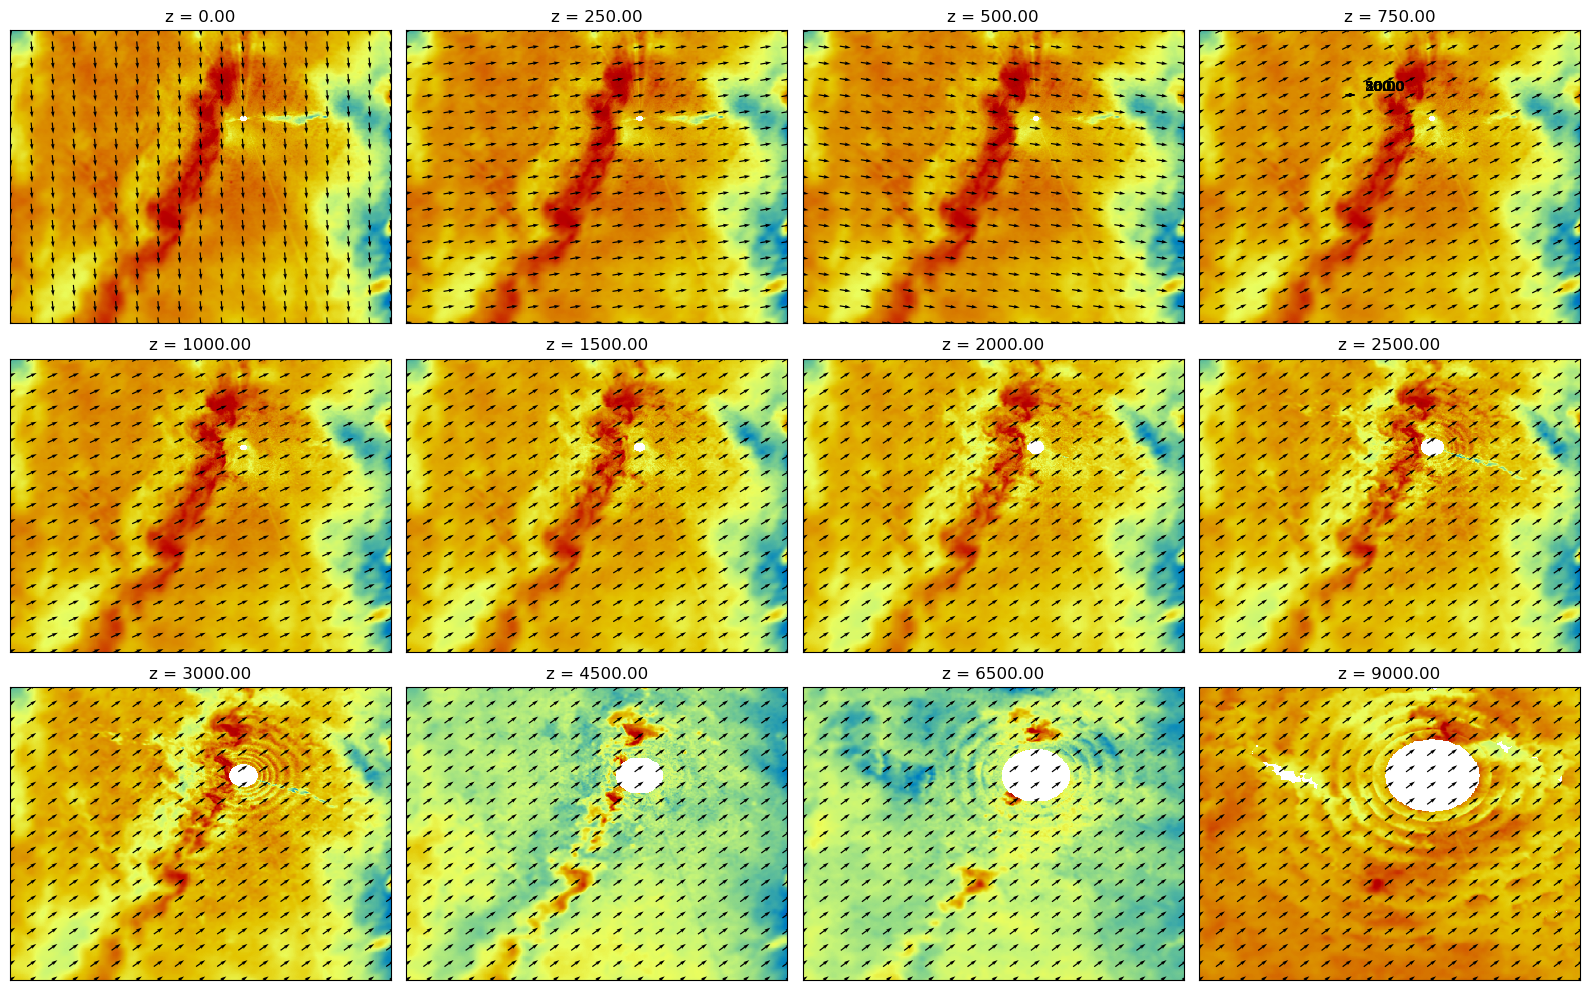

In [422]:
xg = grid_list[0].to_xarray().isel(time=0, z=[0, 1, 2, 3, 4, 6, 8, 10, 12, 18, 26, 36])
stride=20
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))

# Create a figure to hold the subplots
fig = plt.figure(figsize=(16, 10))

# Plot the REF variable using faceted plots
for i, z_value in enumerate(xg_downsampled['z']):
    ax = fig.add_subplot(3, 4, i + 1)  # Adjust the number of rows and columns based on your data
    xg['REF'].sel(z=z_value).plot(cmap='pyart_HomeyerRainbow', ax=ax, add_colorbar=False)
    xg_downsampled.sel(z=z_value).plot.quiver(x='x', y='y', u='u', v='v', pivot='mid', ax=ax)
    ax.set_title(f"z = {z_value.values:.2f}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [423]:
def process_grid_list(grid_list, z_levels):
    xg_list = []

    for grid in grid_list:
        xg = grid.to_xarray().isel(time=0, z=z_levels)
        xg_list.append(xg)

    combined_xg = xr.concat(xg_list, dim='time') 

    return combined_xg

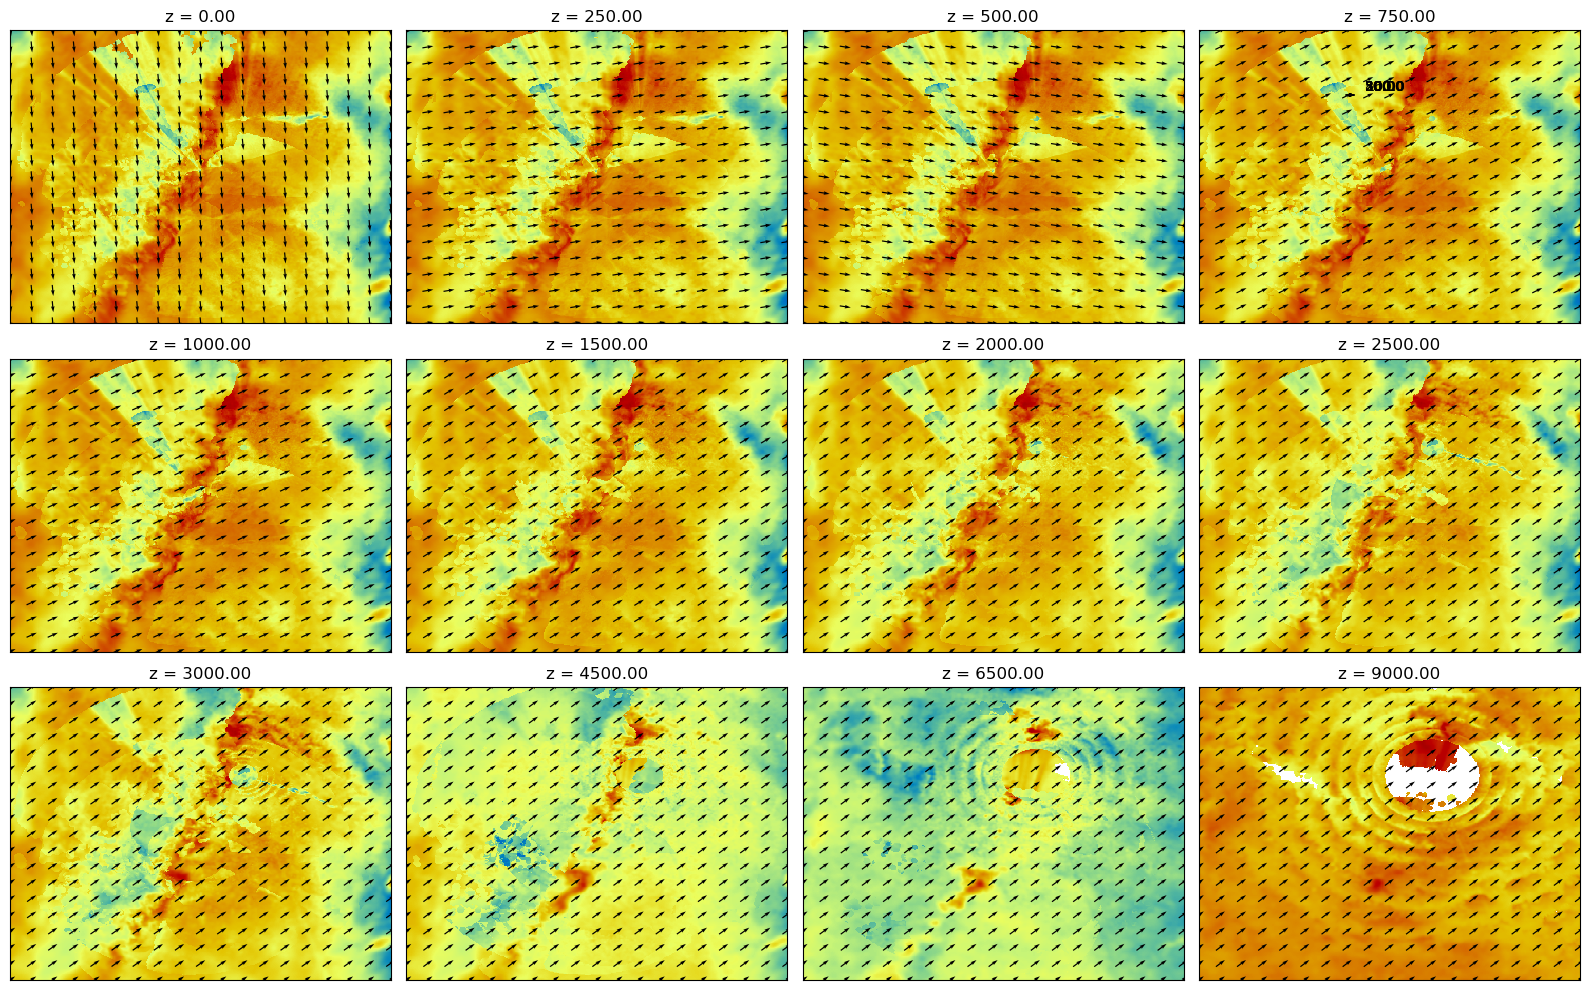

In [427]:
# Example usage with grid_list and z_levels
z_levels = [0, 1, 2, 3, 4, 6, 8, 10, 12, 18, 26, 36]
xg = process_grid_list(grid_list, z_levels).median("time")

stride=20
xg_downsampled = xg.isel(x=slice(None, None, stride), y=slice(None, None, stride))

# Create a figure to hold the subplots
fig = plt.figure(figsize=(16, 10))

# Plot the REF variable using faceted plots
for i, z_value in enumerate(xg_downsampled['z']):
    ax = fig.add_subplot(3, 4, i + 1)  # Adjust the number of rows and columns based on your data
    xg['REF'].sel(z=z_value).plot(cmap='pyart_HomeyerRainbow', ax=ax, add_colorbar=False)
    xg_downsampled.sel(z=z_value).plot.quiver(x='x', y='y', u='u', v='v', pivot='mid', ax=ax)
    ax.set_title(f"z = {z_value.values:.2f}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(''); ax.set_ylabel('')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()